## Trapping Watter II

Given an m x n integer matrix heightMap representing the height of each unit cell in a 2D elevation map, return the volume of water it can trap after raining.

Example 1:

![image](https://assets.leetcode.com/uploads/2021/04/08/trap1-3d.jpg)

Input: heightMap = [[1,4,3,1,3,2],[3,2,1,3,2,4],[2,3,3,2,3,1]]
Output: 4
Explanation: After the rain, water is trapped between the blocks.
We have two small ponds 1 and 3 units trapped.
The total volume of water trapped is 4.

Example 2:

![image](https://assets.leetcode.com/uploads/2021/04/08/trap2-3d.jpg)

Input: heightMap = [[3,3,3,3,3],[3,2,2,2,3],[3,2,1,2,3],[3,2,2,2,3],[3,3,3,3,3]]
Output: 10


Constraints:

m == heightMap.length
n == heightMap[i].length
1 <= m, n <= 200
0 <= heightMap[i][j] <= 2 * 104
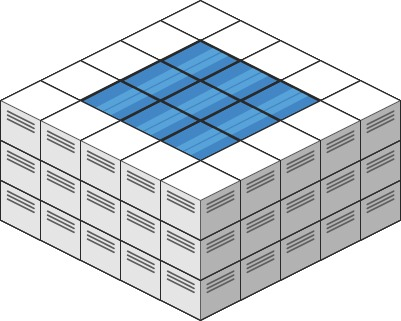

## Explanation:

Water trapped is based on the boundaries. So we start with the outermost boundary and go inside from there. We use priorityqueue to get the min height block of the boundaries, visit the neighbouring cells to find if the height of the neighbour is cell than the boundary, If it is less we increment the water trap, also we push the cells to boundaries queue with the value of max water trap possible instead of original cell height. We loop until all boundaries are processed and return the water trap count.

In [83]:
import java.util.PriorityQueue

data class Cell(
    val value: Int,
    val coord: Pair<Int, Int>
): Comparable<Cell> {
    override fun compareTo(other: Cell): Int {
        return this.value.compareTo(other.value)
    }
}

class Solution {
    fun trapRainWater(heightMap: Array<IntArray>): Int {
        if (heightMap.size <= 1) return 0

        val boundary = PriorityQueue<Cell>()

        // push boundaries to queue
        val lastRow = heightMap.size - 1
        val visited = Array(heightMap.size) { BooleanArray(heightMap[0].size) { false } }

        for ( (i, value) in heightMap.withIndex()) {
            if (i == 0 || i == lastRow) {
                for ((j, rows) in value.withIndex()) {
                    boundary.add(Cell(rows, Pair(i, j)))
                    visited[i][j] = true
                }
            } else {
                boundary.add(Cell(value[0], Pair(i, 0)))
                boundary.add(Cell(value[value.size - 1], Pair(i, value.size - 1)))
                visited[i][0] = true
                visited[i][value.size - 1] = true
            }
        }

        val dRows = intArrayOf(0, 0, -1, 1)
        val dCols = intArrayOf(-1, 1, 0, 0)

        var trappedWater = 0

        while (boundary.isNotEmpty()) {
            val cell = boundary.poll()

            val cellX = cell.coord.first
            val cellY = cell.coord.second

            for (i in 0 until 4) {
                val neighbourX = cellX + dRows[i]
                val neighbourY = cellY + dCols[i]

                if (neighbourX >= 0 && neighbourX < heightMap.size && neighbourY >= 0 && neighbourY < heightMap[0].size && !visited[neighbourX][neighbourY]) {
                    val neighbour = heightMap[neighbourX][neighbourY]
                    if (neighbour <= cell.value) {
                        trappedWater += (cell.value - neighbour)
                    }
                    boundary.add(Cell(max(cell.value, neighbour), Pair(neighbourX, neighbourY)))
                    visited[neighbourX][neighbourY] = true

                }
            }
        }

        println(trappedWater)
        return trappedWater
    }
}

In [84]:
fun main() {

    // [[5,8,7,7],[5,2,1,5],[7,1,7,1],[8,9,6,9],[9,8,9,9]]
    Solution().trapRainWater(arrayOf(
        intArrayOf(5,8,7,7),
        intArrayOf(5,2,1,5),
        intArrayOf(7,1,7,1),
        intArrayOf(8,9,6,9),
        intArrayOf(9, 8, 9, 9)
    ))
}
main()

12
